# **Speech Emotion Recognition (Classification) using Deep LSTM**
***Pre-processing 1 audio sample***
---



# **LIBRARIES**

In [1]:
%%capture
!pip install pydub noisereduce

In [2]:
%%capture
import os
import numpy as np
from pydub import AudioSegment, effects
import librosa
import noisereduce as nr
import matplotlib.pyplot as plt
from librosa import display
import IPython.display as ipd

## **Diagram Explanation**
In general, The following data is extracted from each audio file:
1.   **Emotion representation**

    *   RAVDESS: The filename contains a number that represents an emotion, e.g. 03 is happy.
    *   TESS: The filename contains a direct representation of an emotion, e.g 'happy'.




3. **The audio** is processed in the following order:


*   'AudioSegment' instance: The audio is loaded to an object by the library 'AudioSegment'.
*   Normalization: Each 'AudioSegment' object is normalized to + 5.0 dBFS. 

*   Transforming the object to an array of samples is crucial for the rest of the preprocessing.
*   Trimming the silence in the beginning and the end, to get rid of unnecessary data.
*   Padding every audio file to the same length, for length equalization.
*   Noise reduction is being performed.
---


## **Audio pre-process**

In [3]:
path = 'data/SER-en/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'

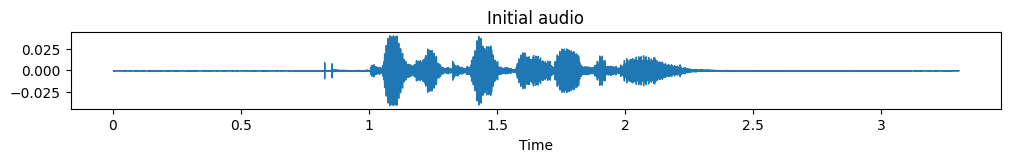

In [4]:
raw_sound = AudioSegment.from_file(path)
x, sr = librosa.load(path, sr=None)
plt.figure(figsize=(12, 1))
librosa.display.waveshow(x, sr=sr)
plt.title('Initial audio')
ipd.display(ipd.Audio(data=x, rate=sr))

The actual audio as well as the 'y' axis range suggests that the initial audio is very low-volumed. This can interfere with the feature extraction validity.




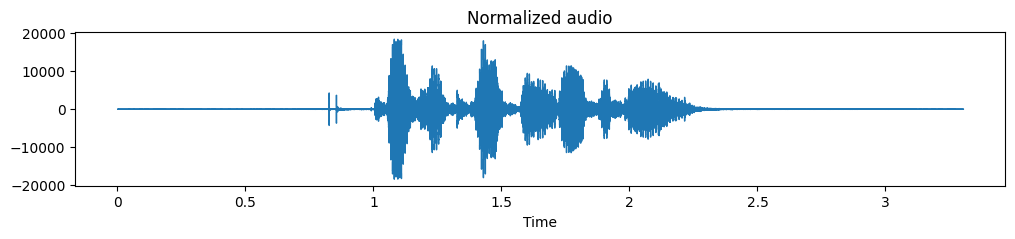

In [5]:
normalized_sound = effects.normalize(raw_sound, headroom=5.0)
normal_x = np.array(normalized_sound.get_array_of_samples(), dtype='float32')
plt.figure(figsize=(12, 2))
librosa.display.waveshow(normal_x, sr=sr)
plt.title('Normalized audio')
ipd.display(ipd.Audio(data=normal_x, rate=sr))

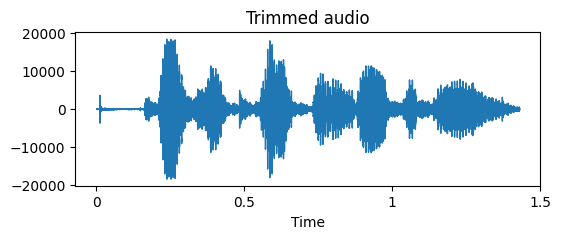

In [6]:
xt, index = librosa.effects.trim(normal_x, top_db=30)
plt.figure(figsize=(6, 2))
librosa.display.waveshow(xt, sr=sr)
plt.title('Trimmed audio')
ipd.display(ipd.Audio(data=xt, rate=sr))

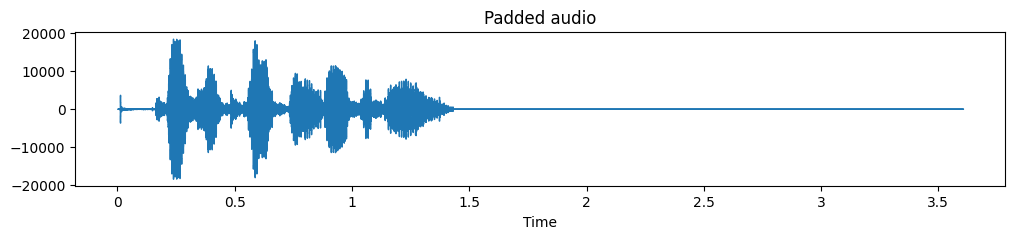

In [7]:

padded_x = np.pad(xt, (0, 173056 - len(xt)), 'constant')

plt.figure(figsize=(12, 2))
librosa.display.waveshow(padded_x, sr=sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data=padded_x, rate=sr))

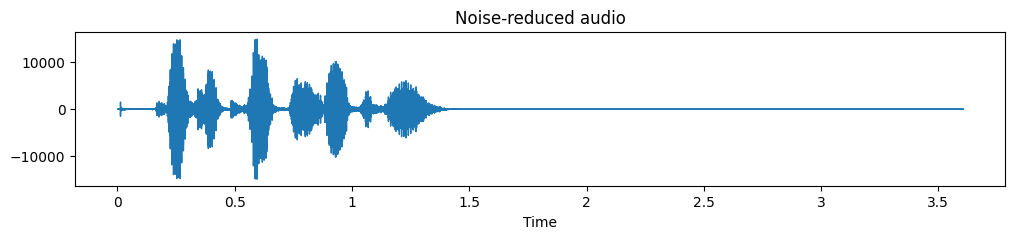

In [8]:

final_x = nr.reduce_noise(y=padded_x, sr=sr,
                          y_noise=padded_x)
plt.figure(figsize=(12, 2))
librosa.display.waveshow(final_x, sr=sr)
plt.title('Noise-reduced audio')
ipd.display(ipd.Audio(data=final_x, rate=sr))

## **Features extraction for a single file**
The selected features being extracted with *librosa* for the speech emotion recognition model are:

1.   Energy - Root Mean Square (RMS)
2.   Zero Crossed Rate (ZCR)
3.   Mel-Frequency Cepstral Coefficients (MFCCs) 



In [9]:
# Feature extraction

frame_length = 2048
hop_length = 512
f1 = librosa.feature.rms(y=final_x, frame_length=frame_length, hop_length=hop_length)
print('Energy shape:', f1.shape)
f2 = librosa.feature.zero_crossing_rate(final_x, frame_length=frame_length,
                                        hop_length=hop_length)
print('ZCR shape:', f2.shape)
f3 = librosa.feature.mfcc(y=final_x, sr=sr, S=None, n_mfcc=13, hop_length=hop_length)
print('MFCCs shape:', f3.shape)

Energy shape: (1, 339)
ZCR shape: (1, 339)
MFCCs shape: (13, 339)
